In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import os 
import re
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics import accuracy_score, classification_report

import warnings 
warnings.filterwarnings('ignore')

In [2]:
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])

def normalize_desc(folder, sub_folder):
    text = folder + " - " + sub_folder 
    text = re.sub(r'\d+', '', text)
    text = text.replace(".", "")
    text = text.strip()
    return text

def print_progress(val, val_len, folder, sub_folder, filename, bar_size=10):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] folder : %s/%s/ ----> file : %s" % (progr, folder, sub_folder, filename), end="\r")
  

In [3]:
dataset_dir = "C:\\Users\\muhgh\\Documents\\Kuliah\\Semester 8\\Skripsi\\Dataset\\rice_leaf_diseases_2\\" 

imgs = [] #list image matrix 
labels = []
descs = []
for folder in os.listdir(dataset_dir):
    img_files = os.listdir(os.path.join(dataset_dir, folder))
    len_files = len(img_files)
    for i, filename in enumerate(img_files):
        img = cv2.imread(os.path.join(dataset_dir, folder, filename))
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        h, w = gray.shape
        # print(h)
        # print(w)
        # ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
        ymin, ymax, xmin, xmax = h//2, h*2//3, w//2, w*2//3
        crop = gray[ymin:ymax, xmin:xmax]
        
        resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)
        
        imgs.append(gray)
        labels.append(normalize_label(os.path.splitext(folder)[0]))
        descs.append(normalize_desc(folder, ''))
        
        print_progress(i, len_files, folder, '', filename)

            


[##########] folder : blast// ----> file : IMG_0722.jpg
[##########] folder : blight// ----> file : IMG_1075.jpg


29
blast


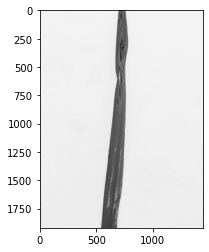

In [4]:
#showing random pic

%matplotlib inline

i = np.random.randint(len(imgs))
print(i)
print(labels[i])
# cv2.imshow('rice',imgs[i])

# cv2.waitKey(0)
# cv2.destroyAllWindows()

# image = cv2.imread(imgs[i])

#Show the image with matplotlib
plt.imshow(imgs[i], cmap = 'gray')
plt.show()

In [5]:
imgs[i].shape

(1920, 1440)

# 4 Angles

In [6]:
#calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    glcm = greycomatrix(img, distances=dists, angles=agls, levels=lvl,symmetric=sym, normed=norm)
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    
    feature = []
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature

In [7]:
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in zip(imgs, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

In [8]:
glcm_df = pd.DataFrame(glcm_all_agls, columns = columns)
glcm_df.head()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,2.117056,1.816825,0.800160,2.004377,0.925240,0.942800,0.990087,0.933583,0.826255,0.810359,...,76.711893,0.069092,0.063526,0.069089,0.063025,0.262854,0.252043,0.262848,0.251047,blast
1,1.414100,1.308155,0.413096,1.250619,0.977965,0.983168,0.999020,0.984125,0.845628,0.822479,...,45.521851,0.077391,0.071491,0.076109,0.071385,0.278192,0.267377,0.275878,0.267179,blast
2,3.323293,3.094738,1.290914,3.037121,0.963921,0.970290,0.996350,0.971711,0.598845,0.571976,...,96.412918,0.004137,0.003509,0.004735,0.003518,0.064316,0.059235,0.068809,0.059310,blast
3,2.782670,2.732185,1.463478,2.618816,0.977723,0.980545,0.996038,0.983002,0.599255,0.551227,...,53.443551,0.004627,0.003687,0.004688,0.003623,0.068022,0.060719,0.068466,0.060193,blast
4,2.514150,2.372299,1.105916,2.384226,0.976506,0.981498,0.997482,0.981669,0.598725,0.566839,...,51.619318,0.005221,0.004484,0.006329,0.004349,0.072257,0.066961,0.079553,0.065947,blast


In [9]:
glcm_df2 = glcm_df.join(pd.get_dummies(glcm_df['label'])).drop('label',axis = 1)

###########################
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(glcm_df['label'])
glcm_df['label_enc'] = le.transform(glcm_df['label'])

In [10]:
glcm_df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label,label_enc
0,2.117056,1.816825,0.800160,2.004377,0.925240,0.942800,0.990087,0.933583,0.826255,0.810359,...,0.069092,0.063526,0.069089,0.063025,0.262854,0.252043,0.262848,0.251047,blast,0
1,1.414100,1.308155,0.413096,1.250619,0.977965,0.983168,0.999020,0.984125,0.845628,0.822479,...,0.077391,0.071491,0.076109,0.071385,0.278192,0.267377,0.275878,0.267179,blast,0
2,3.323293,3.094738,1.290914,3.037121,0.963921,0.970290,0.996350,0.971711,0.598845,0.571976,...,0.004137,0.003509,0.004735,0.003518,0.064316,0.059235,0.068809,0.059310,blast,0
3,2.782670,2.732185,1.463478,2.618816,0.977723,0.980545,0.996038,0.983002,0.599255,0.551227,...,0.004627,0.003687,0.004688,0.003623,0.068022,0.060719,0.068466,0.060193,blast,0
4,2.514150,2.372299,1.105916,2.384226,0.976506,0.981498,0.997482,0.981669,0.598725,0.566839,...,0.005221,0.004484,0.006329,0.004349,0.072257,0.066961,0.079553,0.065947,blast,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.568138,2.713108,1.883193,2.745418,0.984347,0.986921,0.996806,0.986927,0.538656,0.457667,...,0.006911,0.004662,0.005095,0.004605,0.083135,0.068277,0.071383,0.067858,tungro,2
236,1.643743,1.536536,0.598856,1.533074,0.960743,0.969719,0.997819,0.969516,0.839640,0.797577,...,0.062202,0.053557,0.056273,0.053257,0.249404,0.231423,0.237220,0.230774,tungro,2
237,1.547168,1.429414,0.513490,1.397153,0.956325,0.965371,0.997693,0.966942,0.842697,0.813599,...,0.074249,0.065227,0.068470,0.064969,0.272487,0.255396,0.261667,0.254891,tungro,2
238,7.659171,7.144720,4.932508,7.156823,0.950278,0.956060,0.984063,0.958513,0.168257,0.175142,...,0.000334,0.000354,0.000450,0.000346,0.018289,0.018803,0.021220,0.018611,tungro,2


In [11]:
# Shuffling the dataset
glcm_df3 = glcm_df.drop('label',axis=1)

from sklearn.utils import shuffle
shuffled = shuffle(glcm_df3, random_state=1)
shuffled.head()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label_enc
228,2.379598,2.222229,1.013177,2.293555,0.974922,0.978966,0.996428,0.978052,0.736806,0.710848,...,63.252126,0.039526,0.035559,0.038980,0.035879,0.198812,0.188572,0.197434,0.189417,2
194,1.957231,1.994507,1.212201,1.945865,0.982270,0.984962,0.996526,0.984633,0.682279,0.628404,...,48.201944,0.039299,0.031771,0.035085,0.032599,0.198240,0.178243,0.187310,0.180553,2
88,2.877619,2.961969,2.134165,2.953185,0.986054,0.988311,0.996687,0.988801,0.540458,0.473724,...,53.831035,0.009827,0.007029,0.007541,0.006873,0.099133,0.083840,0.086839,0.082904,1
95,3.873295,4.034146,2.971719,3.891558,0.972231,0.974410,0.994198,0.978898,0.414963,0.353909,...,96.464936,0.005059,0.003847,0.003978,0.003739,0.071124,0.062027,0.063068,0.061148,1
214,2.991482,2.946450,1.294809,2.934514,0.958274,0.964253,0.996158,0.963583,0.646805,0.591416,...,118.547960,0.005796,0.004500,0.005455,0.004712,0.076128,0.067079,0.073860,0.068644,2


In [12]:
# Train test split 80-20

from sklearn.model_selection import train_test_split

X = shuffled.drop('label_enc',axis=1)
y = shuffled['label_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC()).fit(X_train,y_train)
clf_lin = OneVsRestClassifier(SVC(kernel = 'linear')).fit(X_train,y_train)
clf_poly = OneVsRestClassifier(SVC(kernel = 'poly')).fit(X_train,y_train)
clf_sig = OneVsRestClassifier(SVC(kernel = 'sigmoid')).fit(X_train,y_train)

clf2 = OneVsRestClassifier(RandomForestClassifier()).fit(X_train,y_train)
clf3 = OneVsRestClassifier(DecisionTreeClassifier()).fit(X_train,y_train)
clf4 = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train,y_train)
clf5 = OneVsRestClassifier(LGBMClassifier()).fit(X_train,y_train)
clf6 = OneVsRestClassifier(xgb.XGBClassifier()).fit(X_train,y_train)
clf7 = OneVsRestClassifier(LogisticRegression()).fit(X_train,y_train)

[21:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
# Train pred

y_pred = clf.predict(X_train)
y_pred_lin = clf_lin.predict(X_train)
y_pred_poly = clf_poly.predict(X_train)
y_pred_sig = clf_sig.predict(X_train)

y_pred2 = clf2.predict(X_train)
y_pred3 = clf3.predict(X_train)
y_pred4 = clf4.predict(X_train)
y_pred5 = clf5.predict(X_train)
y_pred6 = clf6.predict(X_train)
y_pred7 = clf7.predict(X_train)

In [15]:
print('Train Score')
print(f"SVM - RBF      :{round(accuracy_score(y_train,y_pred),3)*100}%")
print(f"SVM - Linear   :{round(accuracy_score(y_train,y_pred_lin),3)*100}%")
print(f"SVM - Poly     :{round(accuracy_score(y_train,y_pred_poly),3)*100}%")
print(f"SVM - Sigmoid  :{round(accuracy_score(y_train,y_pred_sig),3)*100}%")

print(f"Random Forest  :{round(accuracy_score(y_train,y_pred2),3)*100}%")
print(f"Decision Tree  :{round(accuracy_score(y_train,y_pred3),3)*100}%")
print(f"KNN            :{round(accuracy_score(y_train,y_pred4),3)*100}%")
print(f"XGB            :{round(accuracy_score(y_train,y_pred5),3)*100}%")
print(f"LGB            :{round(accuracy_score(y_train,y_pred6),3)*100}%")
print(f"Logreg         :{round(accuracy_score(y_train,y_pred7),3)*100}%")

Train Score
SVM - RBF      :70.8%
SVM - Linear   :80.2%
SVM - Poly     :63.0%
SVM - Sigmoid  :30.7%
Random Forest  :100.0%
Decision Tree  :100.0%
KNN            :75.5%
XGB            :100.0%
LGB            :100.0%
Logreg         :79.7%


* KNN             80% acc
* SVM             68% acc
* Random Forest   overfit
* Decision Tree   overfit
* LGBM            overfit
* XGB             overfit

In [16]:
# Test pred

y_pred_test = clf.predict(X_test)
y_pred_lin_test = clf_lin.predict(X_test)
y_pred_poly_test = clf_poly.predict(X_test)
y_pred_sig_test = clf_sig.predict(X_test)

y_pred2_test = clf2.predict(X_test)
y_pred3_test = clf3.predict(X_test)
y_pred4_test = clf4.predict(X_test)
y_pred5_test = clf5.predict(X_test)
y_pred6_test = clf6.predict(X_test)
y_pred7_test = clf7.predict(X_test)

In [17]:
print('Test Score')
print(f"SVM - RBF      :{round(accuracy_score(y_test,y_pred_test),3)*100}%")
print(f"SVM - Linear   :{round(accuracy_score(y_test,y_pred_lin_test),3)*100}%")
print(f"SVM - Poly     :{round(accuracy_score(y_test,y_pred_poly_test),3)*100}%")
print(f"SVM - Sigmoid  :{round(accuracy_score(y_test,y_pred_sig_test),3)*100}%")
print(f"Random Forest  :{round(accuracy_score(y_test,y_pred2_test),3)*100}%")
print(f"Decision Tree  :{round(accuracy_score(y_test,y_pred3_test),3)*100}%")
print(f"KNN            :{round(accuracy_score(y_test,y_pred4_test),3)*100}%")
print(f"XGB            :{round(accuracy_score(y_test,y_pred5_test),3)*100}%")
print(f"LGB            :{round(accuracy_score(y_test,y_pred6_test),3)*100}%")
print(f"Logreg         :{round(accuracy_score(y_test,y_pred7_test),3)*100}%")

Test Score
SVM - RBF      :68.8%
SVM - Linear   :77.10000000000001%
SVM - Poly     :52.1%
SVM - Sigmoid  :22.900000000000002%
Random Forest  :77.10000000000001%
Decision Tree  :75.0%
KNN            :68.8%
XGB            :75.0%
LGB            :72.89999999999999%
Logreg         :75.0%


# 8 Angle

In [18]:
#calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135, 180, 225, 270, 315 
def calc_glcm_all_agls_8(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4], lvl=256, sym=True, norm=True):
    glcm = greycomatrix(img, distances=dists, angles=agls, levels=lvl,symmetric=sym, normed=norm)
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    
    feature = []
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


In [19]:
# 8 Angle

properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls8 = []
for img, label in zip(imgs, labels): 
    glcm_all_agls8.append(
            calc_glcm_all_agls_8(img, 
                                label, 
                                props=properties)
                            )
 
columns8 = []
angles = ['0', '45', '90','135','180','225','270','315']
for name in properties :
    for ang in angles:
        columns8.append(name + "_" + ang)
        
columns8.append("label")

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed i

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\muhgh\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in

In [20]:
glcm_df8 = pd.DataFrame(glcm_all_agls8, columns = columns8)
glcm_df8

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,dissimilarity_180,dissimilarity_225,dissimilarity_270,dissimilarity_315,correlation_0,correlation_45,...,ASM_315,energy_0,energy_45,energy_90,energy_135,energy_180,energy_225,energy_270,energy_315,label
0,2.117056,1.816825,0.800160,2.004377,2.117056,1.816825,0.800160,2.004377,0.925240,0.942800,...,0.063025,0.262854,0.252043,0.262848,0.251047,0.262854,0.252043,0.262848,0.251047,blast
1,1.414100,1.308155,0.413096,1.250619,1.414100,1.308155,0.413096,1.250619,0.977965,0.983168,...,0.071385,0.278192,0.267377,0.275878,0.267179,0.278192,0.267377,0.275878,0.267179,blast
2,3.323293,3.094738,1.290914,3.037121,3.323293,3.094738,1.290914,3.037121,0.963921,0.970290,...,0.003518,0.064316,0.059235,0.068809,0.059310,0.064316,0.059235,0.068809,0.059310,blast
3,2.782670,2.732185,1.463478,2.618816,2.782670,2.732185,1.463478,2.618816,0.977723,0.980545,...,0.003623,0.068022,0.060719,0.068466,0.060193,0.068022,0.060719,0.068466,0.060193,blast
4,2.514150,2.372299,1.105916,2.384226,2.514150,2.372299,1.105916,2.384226,0.976506,0.981498,...,0.004349,0.072257,0.066961,0.079553,0.065947,0.072257,0.066961,0.079553,0.065947,blast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.568138,2.713108,1.883193,2.745418,2.568138,2.713108,1.883193,2.745418,0.984347,0.986921,...,0.004605,0.083135,0.068277,0.071383,0.067858,0.083135,0.068277,0.071383,0.067858,tungro
236,1.643743,1.536536,0.598856,1.533074,1.643743,1.536536,0.598856,1.533074,0.960743,0.969719,...,0.053257,0.249404,0.231423,0.237220,0.230774,0.249404,0.231423,0.237220,0.230774,tungro
237,1.547168,1.429414,0.513490,1.397153,1.547168,1.429414,0.513490,1.397153,0.956325,0.965371,...,0.064969,0.272487,0.255396,0.261667,0.254891,0.272487,0.255396,0.261667,0.254891,tungro
238,7.659171,7.144720,4.932508,7.156823,7.659171,7.144720,4.932508,7.156823,0.950278,0.956060,...,0.000346,0.018289,0.018803,0.021220,0.018611,0.018289,0.018803,0.021220,0.018611,tungro


In [21]:
###########################
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(glcm_df8['label'])
glcm_df8['label_enc'] = le.transform(glcm_df['label'])

In [22]:
# Shuffling the dataset
glcm_df8 = glcm_df8.drop('label',axis=1)

from sklearn.utils import shuffle
shuffled8 = shuffle(glcm_df8, random_state=1)
shuffled8.head()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,dissimilarity_180,dissimilarity_225,dissimilarity_270,dissimilarity_315,correlation_0,correlation_45,...,ASM_315,energy_0,energy_45,energy_90,energy_135,energy_180,energy_225,energy_270,energy_315,label_enc
228,2.379598,2.222229,1.013177,2.293555,2.379598,2.222229,1.013177,2.293555,0.974922,0.978966,...,0.035879,0.198812,0.188572,0.197434,0.189417,0.198812,0.188572,0.197434,0.189417,2
194,1.957231,1.994507,1.212201,1.945865,1.957231,1.994507,1.212201,1.945865,0.982270,0.984962,...,0.032599,0.198240,0.178243,0.187310,0.180553,0.198240,0.178243,0.187310,0.180553,2
88,2.877619,2.961969,2.134165,2.953185,2.877619,2.961969,2.134165,2.953185,0.986054,0.988311,...,0.006873,0.099133,0.083840,0.086839,0.082904,0.099133,0.083840,0.086839,0.082904,1
95,3.873295,4.034146,2.971719,3.891558,3.873295,4.034146,2.971719,3.891558,0.972231,0.974410,...,0.003739,0.071124,0.062027,0.063068,0.061148,0.071124,0.062027,0.063068,0.061148,1
214,2.991482,2.946450,1.294809,2.934514,2.991482,2.946450,1.294809,2.934514,0.958274,0.964253,...,0.004712,0.076128,0.067079,0.073860,0.068644,0.076128,0.067079,0.073860,0.068644,2


In [23]:
# Train test split 80-20

from sklearn.model_selection import train_test_split

X8 = shuffled8.drop('label_enc',axis=1)
y8 = shuffled8['label_enc']

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.20, random_state=42)

In [24]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.svm import SVC

clf_8 = OneVsRestClassifier(SVC(kernel = 'rbf')).fit(X_train8,y_train8) 
clf_lin_8 = OneVsRestClassifier(SVC(kernel = 'linear')).fit(X_train8,y_train8)
clf_poly_8 = OneVsRestClassifier(SVC(kernel = 'poly')).fit(X_train8,y_train8)
clf_sig_8 = OneVsRestClassifier(SVC(kernel = 'sigmoid')).fit(X_train8,y_train8)

clf2_8 = OneVsRestClassifier(RandomForestClassifier()).fit(X_train8,y_train8)
clf3_8 = OneVsRestClassifier(DecisionTreeClassifier()).fit(X_train8,y_train8)
clf4_8 = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train8,y_train8)
clf5_8 = OneVsRestClassifier(LGBMClassifier()).fit(X_train8,y_train8)
clf6_8 = OneVsRestClassifier(xgb.XGBClassifier()).fit(X_train8,y_train8)
clf7_8 = OneVsRestClassifier(LogisticRegression()).fit(X_train8,y_train8)

[21:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
# Train pred

y_pred_8 = clf_8.predict(X_train8)
y_pred_lin_8 = clf_lin_8.predict(X_train8)
y_pred_poly_8 = clf_poly_8.predict(X_train8)
y_pred_sig_8 = clf_sig_8.predict(X_train8)

y_pred2_8 = clf2_8.predict(X_train8)
y_pred3_8 = clf3_8.predict(X_train8)
y_pred4_8 = clf4_8.predict(X_train8)
y_pred5_8 = clf5_8.predict(X_train8)
y_pred6_8 = clf6_8.predict(X_train8)
y_pred6_8 = clf6_8.predict(X_train8)
y_pred7_8 = clf7_8.predict(X_train8)

In [26]:
print('Train Score')
print(f"SVM - RBF        :{round(accuracy_score(y_train8,y_pred_8),3)*100}%")
print(f"SVM - Linear     :{round(accuracy_score(y_train8,y_pred_lin_8),3)*100}%")
print(f"SVM - Polynomial :{round(accuracy_score(y_train8,y_pred_poly_8),3)*100}%")
print(f"SVM - Sigmoid    :{round(accuracy_score(y_train8,y_pred_sig_8),3)*100}%")

print(f"Random Forest    :{round(accuracy_score(y_train8,y_pred2_8),3)*100}%")
print(f"Decision Tree    :{round(accuracy_score(y_train8,y_pred3_8),3)*100}%")
print(f"KNN              :{round(accuracy_score(y_train8,y_pred4_8),3)*100}%")
print(f"XGB              :{round(accuracy_score(y_train8,y_pred5_8),3)*100}%")
print(f"LGB              :{round(accuracy_score(y_train8,y_pred6_8),3)*100}%")
print(f"Logreg           :{round(accuracy_score(y_train8,y_pred7_8),3)*100}%")

Train Score
SVM - RBF        :70.8%
SVM - Linear     :81.2%
SVM - Polynomial :63.0%
SVM - Sigmoid    :30.7%
Random Forest    :100.0%
Decision Tree    :100.0%
KNN              :75.5%
XGB              :100.0%
LGB              :100.0%
Logreg           :79.7%


In [27]:
# Test pred

y_pred_test_8 = clf_8.predict(X_test8)
y_pred_test_lin_8 = clf_lin_8.predict(X_test8)
y_pred_test_poly_8 = clf_poly_8.predict(X_test8)
y_pred_test_sig_8 = clf_sig_8.predict(X_test8)

y_pred2_8_test = clf2_8.predict(X_test8)
y_pred3_8_test = clf3_8.predict(X_test8)
y_pred4_8_test = clf4_8.predict(X_test8)
y_pred5_8_test = clf5_8.predict(X_test8)
y_pred6_8_test = clf6_8.predict(X_test8)
y_pred7_8_test = clf7_8.predict(X_test8)

In [28]:
print('Test Score')
print(f"SVM - RBF        :{round(accuracy_score(y_test8,y_pred_test_8),3)*100}%")
print(f"SVM - Linear     :{round(accuracy_score(y_test8,y_pred_test_lin_8),3)*100}%")
print(f"SVM - Polynomial :{round(accuracy_score(y_test8,y_pred_test_poly_8),3)*100}%")
print(f"SVM - Sigmoid    :{round(accuracy_score(y_test8,y_pred_test_sig_8),3)*100}%")

print(f"Random Forest    :{round(accuracy_score(y_test8,y_pred2_8_test),3)*100}%")
print(f"Decision Tree    :{round(accuracy_score(y_test8,y_pred3_8_test),3)*100}%")
print(f"KNN              :{round(accuracy_score(y_test8,y_pred4_8_test),3)*100}%")
print(f"XGB              :{round(accuracy_score(y_test8,y_pred5_8_test),3)*100}%")
print(f"LGB              :{round(accuracy_score(y_test8,y_pred6_8_test),3)*100}%")
print(f"Logreg           :{round(accuracy_score(y_test8,y_pred7_8_test),3)*100}%")

Test Score
SVM - RBF        :68.8%
SVM - Linear     :75.0%
SVM - Polynomial :52.1%
SVM - Sigmoid    :22.900000000000002%
Random Forest    :79.2%
Decision Tree    :77.10000000000001%
KNN              :68.8%
XGB              :75.0%
LGB              :72.89999999999999%
Logreg           :75.0%


## Feature Selection

In [29]:
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFwe

bestfeatures = SelectKBest(score_func=f_classif)
fit = bestfeatures.fit(X8,y8)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X8.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  #naming the dataframe columns

print('Feature and F Scores')
print(featureScores.nlargest(48,'Score'))  #print 10 best features

Feature and F Scores
           Attributes       Score
18     homogeneity_90  236.374060
22    homogeneity_270  236.374060
2    dissimilarity_90  220.189848
6   dissimilarity_270  220.189848
3   dissimilarity_135  188.167879
7   dissimilarity_315  188.167879
19    homogeneity_135  186.598739
23    homogeneity_315  186.598739
17     homogeneity_45  184.767185
21    homogeneity_225  184.767185
16      homogeneity_0  183.772080
20    homogeneity_180  183.772080
5   dissimilarity_225  182.794321
1    dissimilarity_45  182.794321
0     dissimilarity_0  159.701891
4   dissimilarity_180  159.701891
30       contrast_270  110.655953
26        contrast_90  110.655953
14    correlation_270   50.049897
10     correlation_90   50.049897
31       contrast_315   46.720625
27       contrast_135   46.720625
42          energy_90   45.855987
46         energy_270   45.855987
44         energy_180   43.809673
40           energy_0   43.809673
43         energy_135   40.558012
47         energy_315   40.

In [30]:
X8_new = SelectKBest(f_classif, k=18).fit_transform(X8, y8)
print(X8_new.shape)

(240, 18)


In [31]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X8_new, y8, test_size=0.20, random_state=42)

In [32]:
# Trying with SVM Linear
# clf_lin_8 = OneVsRestClassifier(SVC(kernel = 'rbf')).fit(X_train_new,y_train8)
clf_lin_8 = OneVsRestClassifier(SVC(kernel = 'linear')).fit(X_train_new,y_train8)
# clf_lin_8 = OneVsRestClassifier(SVC(kernel = 'poly')).fit(X_train_new,y_train8)
# clf_lin_8 = OneVsRestClassifier(SVC(kernel = 'sigmoid')).fit(X_train_new,y_train8)

# clf_lin_8 = OneVsRestClassifier(RandomForestClassifier()).fit(X_train_new,y_train8)
# clf_lin_8 = OneVsRestClassifier(DecisionTreeClassifier()).fit(X_train_new,y_train8)
# clf_lin_8 = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train_new,y_train8)
# clf_lin_8 = OneVsRestClassifier(LGBMClassifier()).fit(X_train_new,y_train8)
# clf_lin_8 = OneVsRestClassifier(xgb.XGBClassifier()).fit(X_train_new,y_train8)
# clf_lin_8 = OneVsRestClassifier(LogisticRegression()).fit(X_train_new,y_train8)



y_pred_lin_8 = clf_lin_8.predict(X_train_new) # Train
y_pred_test_lin_8 = clf_lin_8.predict(X_test_new) # Test
print(f"SVM - Linear Train : {round(accuracy_score(y_train8,y_pred_lin_8),3)*100}%")
print(f"SVM - Linear Test  : {round(accuracy_score(y_test,y_pred_test_lin_8),3)*100}%")

SVM - Linear Train : 67.2%
SVM - Linear Test  : 56.2%


In [33]:
y_pred_lin_8 = clf_lin_8.predict(X_train_new) # Train
y_pred_test_lin_8 = clf_lin_8.predict(X_test_new) # Test

In [34]:
print('Train Result')
print(classification_report(y_train8,y_pred_lin_8))

Train Result
              precision    recall  f1-score   support

           0       0.59      0.99      0.74        69
           1       0.79      0.93      0.86        61
           2       1.00      0.06      0.12        62

    accuracy                           0.67       192
   macro avg       0.79      0.66      0.57       192
weighted avg       0.79      0.67      0.58       192



In [35]:
print('Test Result')
print(classification_report(y_test,y_pred_test_lin_8))

Test Result
              precision    recall  f1-score   support

           0       0.35      0.82      0.49        11
           1       0.82      0.95      0.88        19
           2       0.00      0.00      0.00        18

    accuracy                           0.56        48
   macro avg       0.39      0.59      0.45        48
weighted avg       0.40      0.56      0.46        48



In [36]:
print(f"SVM - Linear Train : {round(accuracy_score(y_train8,y_pred_lin_8),3)*100}%")
print(f"SVM - Linear Test  : {round(accuracy_score(y_test,y_pred_test_lin_8),3)*100}%")

SVM - Linear Train : 67.2%
SVM - Linear Test  : 56.2%


Optimal number of features : 29


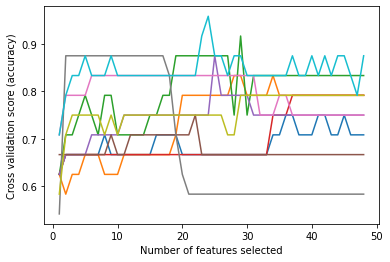

In [37]:
# Recursive feature elimination with cross-validation

from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

svc = SVC(kernel="linear")
# svc = RandomForestClassifier()
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(10),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X8, y8)

print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [38]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False])

In [39]:
selected_feature = []
for i in range(len(rfecv.support_)):
    if rfecv.support_[i] == True:
        selected_feature.append(X8.columns[i])
print(selected_feature)
print(len(selected_feature))

['dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90', 'dissimilarity_135', 'dissimilarity_180', 'dissimilarity_225', 'dissimilarity_270', 'dissimilarity_315', 'correlation_0', 'correlation_45', 'correlation_135', 'correlation_180', 'correlation_225', 'homogeneity_0', 'homogeneity_45', 'homogeneity_90', 'homogeneity_135', 'homogeneity_180', 'homogeneity_225', 'homogeneity_270', 'homogeneity_315', 'ASM_0', 'ASM_45', 'ASM_90', 'ASM_135', 'ASM_180', 'ASM_225', 'ASM_270', 'ASM_315']
29


In [40]:
X_train8_selected = X_train8[selected_feature]
X_test8_selected = X_test8[selected_feature]
model = OneVsRestClassifier(SVC(kernel = 'linear')).fit(X_train8_selected,y_train8)
# model = OneVsRestClassifier(RandomForestClassifier()).fit(X_train8_selected,y_train8)

print(accuracy_score(y_train8,model.predict(X_train8_selected)))
print(accuracy_score(y_test8,model.predict(X_test8_selected)))
# print(model.coef_)

0.6822916666666666
0.5833333333333334


Select from model

In [41]:
import sklearn

lsvc = sklearn.svm.LinearSVC(C=0.01, penalty="l1", dual=False).fit(X8, y8)
model = sklearn.feature_selection.SelectFromModel(lsvc, prefit=True)
X_new2 = model.transform(X8)
X_new2.shape

(240, 6)

In [42]:
X_train_new2, X_test_new2, y_train, y_test = train_test_split(X_new2, y8, test_size=0.20, random_state=42)

In [43]:
# Trying with SVM Linear
clf_lin_8_2 = OneVsRestClassifier(SVC(kernel = 'linear')).fit(X_train_new2,y_train8)
y_pred_lin_8_2 = clf_lin_8_2.predict(X_train_new2) # Train
y_pred_test_lin_8_2 = clf_lin_8_2.predict(X_test_new2) # Test

In [44]:
print('Train Result')
print(classification_report(y_train8,y_pred_lin_8_2))

Train Result
              precision    recall  f1-score   support

           0       0.68      0.67      0.67        69
           1       0.80      0.80      0.80        61
           2       0.62      0.63      0.62        62

    accuracy                           0.70       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.70      0.70      0.70       192



In [45]:
print('Test Result')
print(classification_report(y_test,y_pred_test_lin_8_2))

Test Result
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.73      0.84      0.78        19
           2       0.64      0.39      0.48        18

    accuracy                           0.65        48
   macro avg       0.63      0.65      0.63        48
weighted avg       0.65      0.65      0.63        48



### Trying to use LDA as a Feature Selection Method

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train8, y_train8)
X_test_lda = lda.transform(X_test8)

In [47]:
df_lda = pd.DataFrame({
    'comp1':X_train_lda[:,0],
    'comp2':X_train_lda[:,1],
    'label':y_train8
})

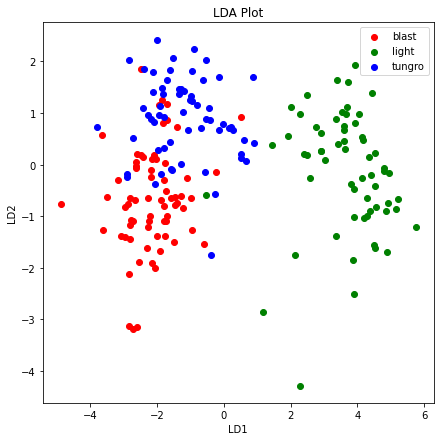

In [48]:
plt.figure(figsize = (7,7))
plt.scatter(df_lda.loc[df_lda['label']==0,'comp1'], df_lda.loc[df_lda['label']==0,'comp2'],color = 'r', label = 'blast')
plt.scatter(df_lda.loc[df_lda['label']==1,'comp1'], df_lda.loc[df_lda['label']==1,'comp2'],color = 'g', label = 'light')
plt.scatter(df_lda.loc[df_lda['label']==2,'comp1'], df_lda.loc[df_lda['label']==2,'comp2'],color = 'b', label = 'tungro')
plt.title('LDA Plot')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.multiclass import OneVsOneClassifier

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train8, y_train8)
X_test_lda = lda.transform(X_test8)

# clf_lin_8_lda = OneVsRestClassifier(SVC(kernel = 'linear')).fit(X_train_lda,y_train8)
clf_lin_8_lda = OneVsOneClassifier(SVC(kernel = 'linear')).fit(X_train_lda,y_train8)
# clf_lin_8_lda = OneVsRestClassifier(sklearn.discriminant_analysis.LinearDiscriminantAnalysis()).fit(X_train_lda,y_train8)

y_pred_lin_8_lda = clf_lin_8_lda.predict(X_train_lda) # Train
y_pred_test_lin_8_lda = clf_lin_8_lda.predict(X_test_lda) # Test

print(accuracy_score(y_train8,y_pred_lin_8_lda))
print(accuracy_score(y_test8,y_pred_test_lin_8_lda))
print('---------------------------Train---------------------------')
print(classification_report(y_train8,y_pred_lin_8_lda))
print('---------------------------Test---------------------------')
print(classification_report(y_test8,y_pred_test_lin_8_lda))

0.8802083333333334
0.7708333333333334
---------------------------Train---------------------------
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        69
           1       1.00      0.98      0.99        61
           2       0.84      0.79      0.82        62

    accuracy                           0.88       192
   macro avg       0.89      0.88      0.88       192
weighted avg       0.88      0.88      0.88       192

---------------------------Test---------------------------
              precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.90      0.95      0.92        19
           2       0.79      0.61      0.69        18

    accuracy                           0.77        48
   macro avg       0.75      0.76      0.75        48
weighted avg       0.78      0.77      0.77        48



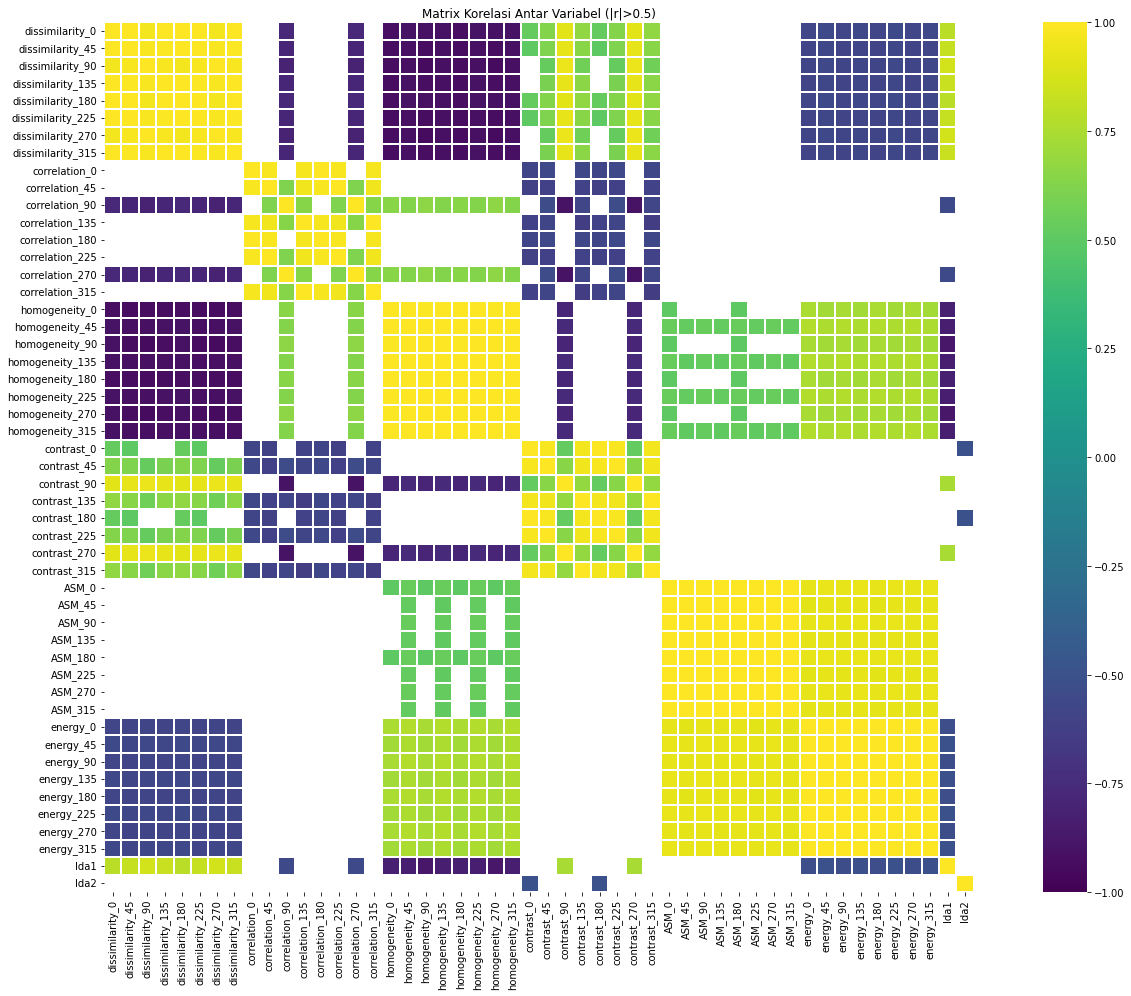

In [102]:
df_lda = X_train8.copy()
df_lda['lda1'] = X_train_lda[:,0]
df_lda['lda2'] = X_train_lda[:,1]
df_lda.corr()
corr2 = df_lda.corr()
plt.figure(figsize=(25, 16))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.5)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=False, annot_kws={"size": 14}, square=True)
plt.title('Matrix Korelasi Antar Variabel (|r|>0.5)')
plt.show()  

### Recursive Feature Elimination

In [50]:
from sklearn.feature_selection import RFECV
from tqdm import tqdm

# X_train8, X_test8, y_train8, y_test8
#no of features

nof_list=[1,2,3,4]          
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]

for n in tqdm(range(len(nof_list))):
    model = OneVsRestClassifier(SVC(kernel = 'linear'))
#     rfe = RFE(model, n_features_to_select=nof_list[n])
    rfecv = RFECV(model, step=1, cv=5)
    
#     X_train_rfe = rfe.fit_transform(X_train8,y_train8)
#     X_test_rfe = rfe.transform(X_test8)
    
#     model.fit(X_train_rfe,y_train8)
#     score = model.score(X_test_rfe,y_test8)
#     score = accuracy_score(y_test8,model.predict(X_test_rfe))

    X_train_rfecv = rfecv.fit_transform(X_train8,y_train8)
    X_test_rfecv = rfecv.transform(X_test8)
    
    model.fit(X_train_rfecv,y_train8)
    score = model.score(X_test_rfecv,y_test8)

    print(score)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

 25%|█████████████████████                                                               | 1/4 [00:25<01:17, 25.94s/it]

0.75


 50%|██████████████████████████████████████████                                          | 2/4 [00:51<00:51, 25.93s/it]

0.75


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [01:17<00:25, 25.91s/it]

0.75


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:43<00:00, 25.91s/it]

0.75
Optimum number of features: 1
Score with 1 features: 0.750000


In [51]:
model = OneVsRestClassifier(SVC(kernel = 'linear'))
selector = RFECV(model, step=1, cv=5)
selector = selector.fit(X_train8, y_train8)
print(selector.support_)

[ True  True  True False  True  True  True False  True False False  True
  True False False  True  True  True  True  True  True  True  True  True
  True  True False False  True False  True  True  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True]


In [52]:
arrlist = selector.support_

In [53]:
print(selector.ranking_)

[ 1  1  1  8  1  1  1  5  1  4 12  1  1  3 11  1  1  1  1  1  1  1  1  1
  1  1  9 10  1  7  1  1  1  1  1  1  1  1  1  1  2  1  1  1  6  1  1  1]


In [54]:
selected_feature = []
for i in range(len(arrlist)):
    if arrlist[i] == True:
        selected_feature.append(X_train8.columns[i])
print(selected_feature)
print(len(selected_feature))

['dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90', 'dissimilarity_180', 'dissimilarity_225', 'dissimilarity_270', 'correlation_0', 'correlation_135', 'correlation_180', 'correlation_315', 'homogeneity_0', 'homogeneity_45', 'homogeneity_90', 'homogeneity_135', 'homogeneity_180', 'homogeneity_225', 'homogeneity_270', 'homogeneity_315', 'contrast_0', 'contrast_45', 'contrast_180', 'contrast_270', 'contrast_315', 'ASM_0', 'ASM_45', 'ASM_90', 'ASM_135', 'ASM_180', 'ASM_225', 'ASM_270', 'ASM_315', 'energy_45', 'energy_90', 'energy_135', 'energy_225', 'energy_270', 'energy_315']
37


In [55]:
X_train8_selected = X_train8[selected_feature]
X_test8_selected = X_test8[selected_feature]

In [56]:
model.fit(X_train8_selected,y_train8)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

In [57]:
print(accuracy_score(y_train8,model.predict(X_train8_selected)))
print(accuracy_score(y_test8,model.predict(X_test8_selected)))

0.8072916666666666
0.75


### Correlation based

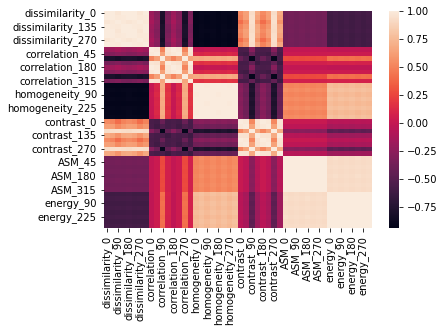

In [58]:
sns.heatmap(X8.corr())
plt.show()

In [59]:
X8.corr()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,dissimilarity_180,dissimilarity_225,dissimilarity_270,dissimilarity_315,correlation_0,correlation_45,...,ASM_270,ASM_315,energy_0,energy_45,energy_90,energy_135,energy_180,energy_225,energy_270,energy_315
dissimilarity_0,1.000000,0.992682,0.968115,0.994040,1.000000,0.992682,0.968115,0.994040,-0.192717,-0.300071,...,-0.374436,-0.362213,-0.605542,-0.582221,-0.601899,-0.585186,-0.605542,-0.582221,-0.601899,-0.585186
dissimilarity_45,0.992682,1.000000,0.981689,0.988765,0.992682,1.000000,0.981689,0.988765,-0.174162,-0.295241,...,-0.385935,-0.373159,-0.616756,-0.595015,-0.615230,-0.597095,-0.616756,-0.595015,-0.615230,-0.597095
dissimilarity_90,0.968115,0.981689,1.000000,0.981023,0.968115,0.981689,1.000000,0.981023,-0.131070,-0.255275,...,-0.379576,-0.366073,-0.611238,-0.589636,-0.612499,-0.592115,-0.611238,-0.589636,-0.612499,-0.592115
dissimilarity_135,0.994040,0.988765,0.981023,1.000000,0.994040,0.988765,0.981023,1.000000,-0.174872,-0.281063,...,-0.383968,-0.371318,-0.615820,-0.593051,-0.614121,-0.596435,-0.615820,-0.593051,-0.614121,-0.596435
dissimilarity_180,1.000000,0.992682,0.968115,0.994040,1.000000,0.992682,0.968115,0.994040,-0.192717,-0.300071,...,-0.374436,-0.362213,-0.605542,-0.582221,-0.601899,-0.585186,-0.605542,-0.582221,-0.601899,-0.585186
dissimilarity_225,0.992682,1.000000,0.981689,0.988765,0.992682,1.000000,0.981689,0.988765,-0.174162,-0.295241,...,-0.385935,-0.373159,-0.616756,-0.595015,-0.615230,-0.597095,-0.616756,-0.595015,-0.615230,-0.597095
dissimilarity_270,0.968115,0.981689,1.000000,0.981023,0.968115,0.981689,1.000000,0.981023,-0.131070,-0.255275,...,-0.379576,-0.366073,-0.611238,-0.589636,-0.612499,-0.592115,-0.611238,-0.589636,-0.612499,-0.592115
dissimilarity_315,0.994040,0.988765,0.981023,1.000000,0.994040,0.988765,0.981023,1.000000,-0.174872,-0.281063,...,-0.383968,-0.371318,-0.615820,-0.593051,-0.614121,-0.596435,-0.615820,-0.593051,-0.614121,-0.596435
correlation_0,-0.192717,-0.174162,-0.131070,-0.174872,-0.192717,-0.174162,-0.131070,-0.174872,1.000000,0.977610,...,-0.010814,-0.009174,-0.030428,-0.030718,-0.031660,-0.028809,-0.030428,-0.030718,-0.031660,-0.028809
correlation_45,-0.300071,-0.295241,-0.255275,-0.281063,-0.300071,-0.295241,-0.255275,-0.281063,0.977610,1.000000,...,0.028189,0.028069,0.034606,0.032135,0.034129,0.033694,0.034606,0.032135,0.034129,0.033694


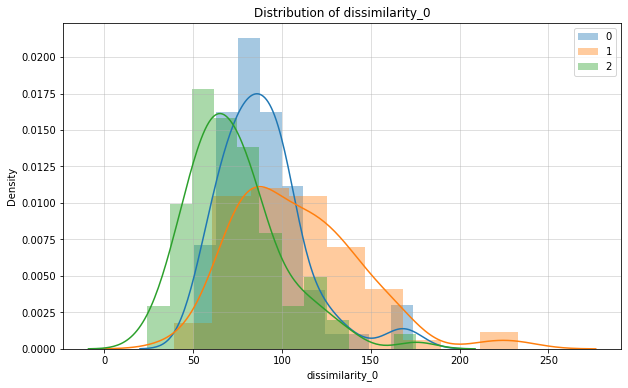

In [60]:
plt.figure(figsize=(10,6))
plt.grid(True, alpha=0.5)
sns.distplot(shuffled.loc[shuffled['label_enc'] == 0, 'contrast_0'], label = '0')
sns.distplot(shuffled.loc[shuffled['label_enc'] == 1, 'contrast_0'] ,  label = '1')
sns.distplot(shuffled.loc[shuffled['label_enc'] == 2, 'contrast_0'] ,  label = '2')
plt.xlabel('dissimilarity_0')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of dissimilarity_0');

In [61]:
import statsmodels.formula.api as sm
from statsmodels.regression.linear_model import OLS
def backwardElimination(x, Y, sl, columns):
    numVars = len(x)
    for i in range(0, numVars):
        regressor_OLS = OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
#                     x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [62]:
columns = np.full((X8.corr().shape[0],), True, dtype=bool)
for i in range(X8.corr().shape[0]):
    for j in range(i+1, X8.corr().shape[0]):
        if X8.corr().iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [63]:
selected_feature = []
for i in range(len(columns)):
    if columns[i] == True:
        selected_feature.append(X8.columns[i])
print(selected_feature)
print(len(selected_feature))

['dissimilarity_0', 'correlation_0', 'correlation_90', 'homogeneity_0', 'contrast_0', 'ASM_0']
6
